In [1]:
import numpy as np
import math as m
import matplotlib.pyplot as plt

In [2]:
#constants

mean=m.sqrt(2.0/m.pi)

u0=10
intensity=5
c=1.05*intensity*mean

In [3]:
#modelling function- returns lists of times and vyplaty
def modelling(timelimit):
    time=0
    capital=u0
    time_list=[]
    vyplaty_list=[]
    while(True):
        X_i=abs(np.random.normal(loc=0.0,scale=1.0)) #loc=mean, scale=D
        tau_i=np.random.exponential(scale=1.0/intensity) #scale=beta=1/lambda
        time+=tau_i
        capital=capital+c*tau_i-X_i
        if(time>timelimit):
            break
        time_list.append(time)
        vyplaty_list.append(X_i)
        if(capital<=0):
            break
    return (time_list, vyplaty_list, capital)

In [4]:
#drawing function. each vyplata has 2 points(before and after)
def draw(time_list, vyplaty_list,timelimit):
    n=len(time_list)#count of vyplata
    capitals=[u0]
    suma_vyplat=0
    times=[0]
    for i in range(n):
        capitals.append(u0+c*time_list[i]-suma_vyplat)
        suma_vyplat+=vyplaty_list[i]
        capitals.append(u0+c*time_list[i]-suma_vyplat)
        times.append(time_list[i])
        times.append(time_list[i])
    if(capitals[-1]>0):
        capitals.append(u0+c*timelimit-suma_vyplat)
        times.append(timelimit)
    plt.plot(times,capitals)

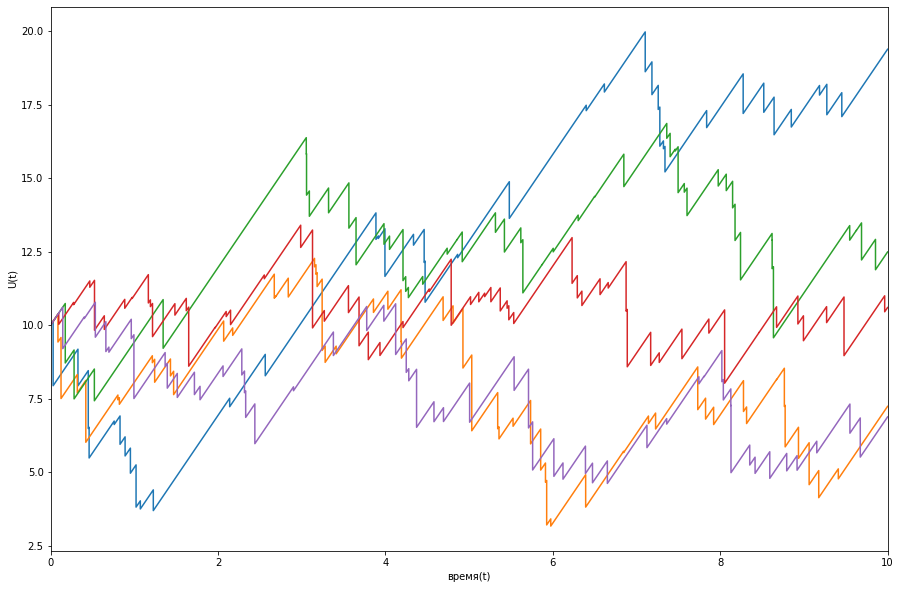

In [5]:
plt.figure(figsize=(15,10))
plt.xlim((0,10))
plt.xlabel('время(t)')
plt.ylabel('U(t)')
for i in range(5):
    temp=modelling(10)
    draw(temp[0],temp[1],10)

In [6]:
from scipy.integrate import quad
def f_X_hat(z):
    #return m.sqrt(m.pi/2.0)*z*(1-m.erf(z/m.sqrt(2.0))) + (1-m.exp((-z*z)/2.0) ) #accurate formula
    return (1/mean)*quad(lambda t: 1-m.erf(t/m.sqrt(2)) , 0, z)[0] #numeric integration

In [7]:
def generate(cdf):
    x=np.random.uniform()
    s=0.25
    while(cdf(s)<x):
        s=s*2
    #F(s/2)<x, F(s)>=x. Let's do s-=(10^i)*eps 
    eps=0.000001
    for i in np.arange(-m.log10(eps),-1,-1):
        while(cdf(s-pow(10,i)*eps)>x):
            s-=pow(10,i)*eps
    return s

In [8]:
#rough Monte-Carlo method
n_bankrots=0
n_experiments=1000
time_limit=1000
for i in np.arange(n_experiments):
    temp=modelling(time_limit)
    if(temp[2]<=0):
        n_bankrots+=1
print(n_bankrots/n_experiments)

0.439


In [9]:
#more accurate Monte-Carlo method(using X_hat)
n_bankrots=0
p=1-intensity*mean/c
for i in np.arange(n_experiments):
    N=np.random.geometric(p)-1
    S=0
    for j in range(N):
        S+=generate(f_X_hat)
    if(S>=u0):
        n_bankrots+=1
print(n_bankrots/n_experiments)

0.436


In [10]:
#t=1000,n=1000
#[0.48,0.462] - accurate integral
#[0.438,0.433]- accurate integral
#[0.433,0.444]- accurate integral
#[0.44,0.46]-accurate integral 
#[0.461,0.411]-accurate integral
#[0.449,0.449]-numerical integral
#[0.465,0.452]-numerical integral
#[0.415,0.419]-numerical integral
#[0.449,0.467]-numerical integral
#[0.439,0.436]-numerical integral